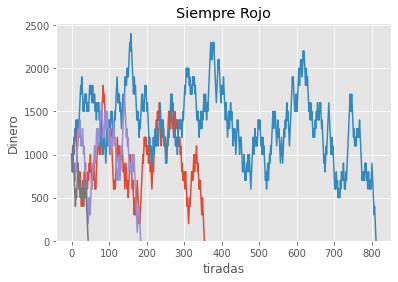

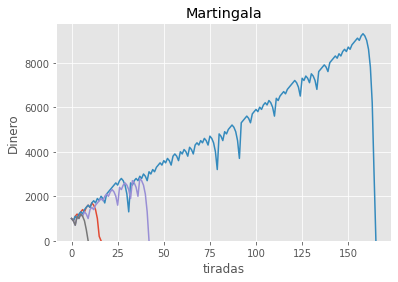

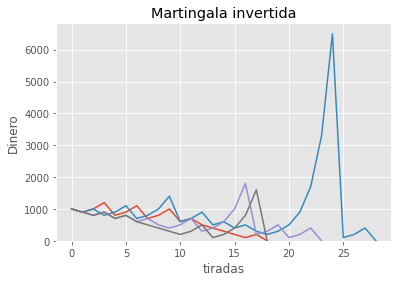

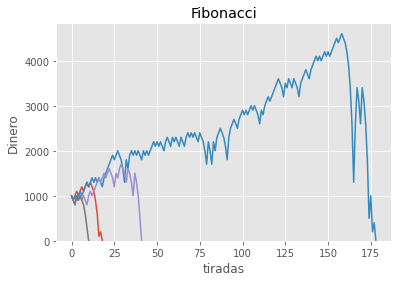

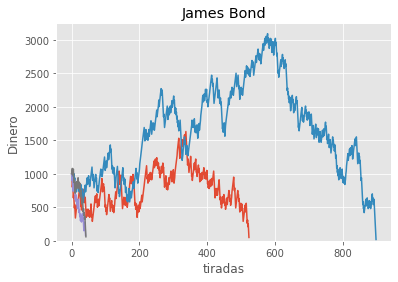

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random


ruleta = {0: 'g', 1: 'r', 2: 'b', 3: 'r', 4: 'b', 5: 'r', 6: 'b', 7: 'r',
          8: 'b', 9: 'r', 10: 'b', 11: 'b', 12: 'r', 13: 'b', 14: 'r', 15: 'b', 16: 'r',
          17: 'b', 18: 'r', 19: 'r', 20: 'b', 21: 'r', 22: 'b', 23: 'r', 24: 'b', 25: 'r',
          26: 'b', 27: 'r', 28: 'b', 29: 'b', 30: 'r', 31: 'b', 32: 'r', 33: 'b', 34: 'r',
          35: 'b', 36: 'r'}


def girar_ruleta():
  numero = random.randint(0, 36)
  return numero


experimentos = 4
dinero = 1000
num = np.array([], dtype=int)
din_sr = np.array([dinero], dtype=int)
din_mg = np.array([dinero], dtype=int)
win_r_mg = 0
din_fb = np.array([dinero], dtype=int)
win_r_fb = 1
din_jb = np.array([dinero], dtype=int)
din_mgi = np.array([dinero], dtype=int)
win_r_mgi = 0
num = np.array([], dtype=int)

din_sr_r = [np.array([]) for x in range(experimentos)]
din_mg_r = [np.array([]) for x in range(experimentos)]
din_fb_r = [np.array([]) for x in range(experimentos)]
din_jb_r = [np.array([]) for x in range(experimentos)]
din_mgi_r = [np.array([]) for x in range(experimentos)]


def fib(n):
  if n < 2:
    return n
  else:
    return fib(n-1) + fib(n-2)


def siempre_rojo(color, apuesta, i):
  if color == 'r':
    return apuesta
  else:
    return -apuesta


def martingala(apuesta, color, n, i):
  global win_r_mg
  global din_mg
  if color == ruleta.get(n):
    if din_mg[i] >= apuesta * pow(2, win_r_mg):
      gano = apuesta * pow(2, win_r_mg)
    else:
      gano = din_mg[i]
    win_r_mg = 0
    return gano
  else:
    if din_mg[i] >= apuesta * pow(2, win_r_mg):
      perdio = -apuesta * pow(2, win_r_mg)
    else:
      perdio = -din_mg[i]
    win_r_mg = win_r_mg + 1
    return perdio


def fibonacci(apuesta, color, n, i):
  global win_r_fb
  if color == ruleta.get(n):
    if din_fb[i] >= apuesta * fib(win_r_fb):
      gano = apuesta * fib(win_r_fb)
    else:
      gano = din_fb[i]
    if win_r_fb >= 3:
      win_r_fb = win_r_fb - 2
    else:
      win_r_fb = 1
    return gano
  else:
    if din_fb[i] >= apuesta * fib(win_r_fb):
      perdio = -apuesta * fib(win_r_fb)
    else:
      perdio = -din_fb[i]
    win_r_fb = win_r_fb + 1
    return perdio

def james_bond(n, apuesta, i):
  if n >= 19 and n <= 36:
    return apuesta * 8
  elif n == 0:
    return apuesta * 16
  elif n >= 13 and n <= 18:
    return apuesta * 10
  else:
    return (apuesta * -20)

def martingalainvertida(apuesta, color, n, i):
  global win_r_mgi
  global din_mgi
  if color == ruleta.get(n):
    if din_mgi[i] >= apuesta * pow(2, win_r_mgi):
      gano = apuesta * pow(2, win_r_mgi)
    else:
      gano = din_mgi[i]
    win_r_mgi = win_r_mgi + 1
    return gano
  else:
    if din_mgi[i] >= apuesta * pow(2, win_r_mgi):
      perdio = -apuesta * pow(2, win_r_mgi)
    else:
      perdio = -din_mgi[i]
    win_r_mgi = 0
    return perdio


for j in range(experimentos):
  i = 0
  condicion = [True, True, True, True, True]
  num = np.array([], dtype=int)
  din_sr = np.array([dinero], dtype=int)
  din_mg = np.array([dinero], dtype=int)
  win_r_mg = 0
  din_fb = np.array([dinero], dtype=int)
  win_r_fb = 1
  din_jb = np.array([dinero], dtype=int)
  din_mgi = np.array([dinero], dtype=int)
  win_r_mgi = 0
  num = np.array([], dtype=int)
  while any(condicion):
    n = girar_ruleta()
    num = np.append(num, [n])
    if condicion[0]:
      if din_sr[i] >= 99:
        din_sr = np.append(din_sr, [din_sr[i] + siempre_rojo(ruleta.get(n), 100, i)])
      else:
        condicion[0] = False
    if condicion[1]:
      if din_jb[i] > 99:
        din_jb = np.append(din_jb, [din_jb[i] + james_bond(n, 5, i)])
      else:
        condicion[1] = False
    if condicion[2]:
      if din_mg[i] >= 99:
        din_mg = np.append(din_mg, [din_mg[i] + martingala(100, 'r', n, i)])
      else:
        condicion[2] = False
    if condicion[3]:
      if din_mgi[i] >= 99:
        din_mgi = np.append(din_mgi, [din_mgi[i] + martingalainvertida(100, 'r', n, i)])
      else:
        condicion[3] = False
    if condicion[4]:
      if din_fb[i] >= 99:
        din_fb = np.append(din_fb, [din_fb[i] + fibonacci(100, 'r', n, i)])
      else:
        condicion[4] = False
    i = i + 1
  din_sr_r[j] = np.append(din_sr_r[j], din_sr)
  din_mg_r[j] = np.append(din_mg_r[j], din_mg)
  din_fb_r[j] = np.append(din_fb_r[j], din_fb)
  din_jb_r[j] = np.append(din_jb_r[j], din_jb)
  din_mgi_r[j] = np.append(din_mgi_r[j], din_mgi)


plt.style.use("ggplot")

for i in range(experimentos):
  plt.plot(range(len(din_sr_r[i])), din_sr_r[i])
plt.title("Siempre Rojo")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.ylim(bottom=0)
plt.show()

for i in range(experimentos):
  plt.plot(range(len(din_mg_r[i])), din_mg_r[i])
plt.title("Martingala")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.ylim(bottom=0)
plt.show()

for i in range(experimentos):
  plt.plot(range(len(din_mgi_r[i])), din_mgi_r[i])
plt.title("Martingala invertida")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.ylim(bottom=0)
plt.show()

for i in range(experimentos):
  plt.plot(range(len(din_fb_r[i])), din_fb_r[i])
plt.title("Fibonacci")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.ylim(bottom=0)
plt.show()

for i in range(experimentos):
  plt.plot(range(len(din_jb_r[i])), din_jb_r[i])
plt.title("James Bond")
plt.xlabel("tiradas")
plt.ylabel("Dinero")
plt.ylim(bottom=0)
plt.show()

